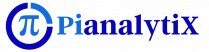

## Dog Breed Prediction

In this project, we will see how to use Keras and TensorFlow to build, train, and test a Convolutional Neural Network capable of identifying the breed of a dog in a supplied image. This is a supervised learning problem, specifically a multiclass classification problem.

In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

We will start by connecting to Kaggle using Kaggle API which can be downloaded from your Kaggle account's settings and uploading it here(upload box).

In [15]:
# Next, install the Kaggle API client.
!pip install -q kaggle

Next we will install Kaggle API using pip installation.

In [3]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


Setting up Kaggle using Kaggle API.

In [ ]:
# Creating directory and changing the current working directory
!mkdir dog_dataset
%cd dog_dataset

To store the data we will create a new directory and make it as current working directory.

In [9]:
# Searching for dataset
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           5424          8  0.1764706        


Searching Kaggle for the required dataset using search option(-s) with title 'dogbreedidfromcomp'. We can also use different search options like searching competitions, notebooks, kernels, datasets, etc.

In [10]:
# Downloading dataset and coming out of directory
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..


C:\Users\desaim2\OneDrive - Schindler\Documents



  0%|          | 0.00/691M [00:00<?, ?B/s]
  0%|          | 1.00M/691M [00:01<18:04, 667kB/s]
  0%|          | 2.00M/691M [00:01<08:59, 1.34MB/s]
  0%|          | 3.00M/691M [00:01<05:34, 2.16MB/s]
  1%|          | 5.00M/691M [00:02<02:57, 4.05MB/s]
  1%|1         | 7.00M/691M [00:02<01:59, 6.01MB/s]
  1%|1         | 9.00M/691M [00:02<01:27, 8.15MB/s]
  2%|1         | 11.0M/691M [00:02<01:09, 10.3MB/s]
  2%|1         | 13.0M/691M [00:02<01:01, 11.5MB/s]
  2%|2         | 15.0M/691M [00:02<01:04, 11.0MB/s]
  3%|2         | 18.0M/691M [00:02<00:48, 14.6MB/s]
  3%|2         | 20.0M/691M [00:03<01:10, 10.0MB/s]
  3%|3         | 22.0M/691M [00:03<01:00, 11.6MB/s]
  3%|3         | 24.0M/691M [00:03<01:13, 9.50MB/s]
  4%|3         | 27.0M/691M [00:03<01:04, 10.8MB/s]
  4%|4         | 30.0M/691M [00:04<00:58, 11.9MB/s]
  5%|4         | 33.0M/691M [00:04<00:56, 12.1MB/s]
  5%|5         | 36.0M/691M [00:04<00:52, 13.1MB/s]
  6%|5         | 39.0M/691M [00:04<00:43, 15.8MB/s]
  6%|5         | 41.0

After searching the data next step would be downloading the data into collab notebook using references found in search option.

In [11]:
# Unzipping downloaded file and removing unusable file
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv

'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


We will unzip the data which is downloaded and remove the irrelevant files. 

In [16]:
import zipfile
import os

In [19]:
# Define paths
zip_file_path = 'Collab Code\dogbreedidfromcomp.zip'
output_dir = 'dog_dataset'

In [ ]:
# Unzip the downloaded file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

In [ ]:
# Remove the downloaded zip file
os.remove(zip_file_path)

In [ ]:
# Remove the sample_submission.csv file
os.remove(os.path.join(output_dir, 'sample_submission.csv'))

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [1]:
# Important library imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

Importing required libraries.

In [2]:
# Read the labels.csv file and checking shape and records
labels_all = pd.read_csv("labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


Loading the labels data into dataframe and viewing it. Here we analysed that labels contains 10222 rows and 2 columns.  

In [5]:
# Visualize the number of each breeds
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
breed_counts
#breed_counts.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

Here we are finding out the count per class i.e. total data in each class using value_counts() function.

In [6]:
# Selecting first 3 breeds (Limitation due to computation power)
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog','afghan_hound','entlebucher']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,80,01ee3c7ff9bcaba9874183135877670e,entlebucher
4,88,021b5a49189665c0442c19b5b33e8cf1,entlebucher


We will work on only 5 breeds due to limited computational power. You can consider more classes as per your system computational power.

In [7]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('dog_dataset/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|███████████████████████████████████████████████████████████████████████████████| 588/588 [00:05<00:00, 102.00it/s]


Train Images shape:  (588, 224, 224, 3)  size: 88,510,464
One-hot encoded output shape:  (588, 5)  size: 2,940


In [24]:
X_data

array([[[[0.01960784, 0.02352941, 0.        ],
         [0.02745098, 0.03137255, 0.        ],
         [0.03921569, 0.04313726, 0.01176471],
         ...,
         [0.3372549 , 0.39607844, 0.0627451 ],
         [0.35686275, 0.39607844, 0.16078432],
         [0.34509805, 0.38431373, 0.14901961]],

        [[0.03137255, 0.03529412, 0.00392157],
         [0.03137255, 0.03529412, 0.00392157],
         [0.03137255, 0.03529412, 0.00392157],
         ...,
         [0.35686275, 0.41568628, 0.09803922],
         [0.35686275, 0.39607844, 0.15686275],
         [0.34901962, 0.3882353 , 0.14901961]],

        [[0.03137255, 0.03529412, 0.00392157],
         [0.02745098, 0.03137255, 0.        ],
         [0.02352941, 0.02745098, 0.        ],
         ...,
         [0.3254902 , 0.38039216, 0.07843138],
         [0.3529412 , 0.3882353 , 0.13333334],
         [0.34901962, 0.38431373, 0.12941177]],

        ...,

        [[0.20392157, 0.25882354, 0.11764706],
         [0.1254902 , 0.18039216, 0.04313726]

In [25]:
Y_data

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

As we are working with the classification dataset first we need to one hot encode the target value i.e. the classes. After that we will read images and convert them into numpy array and finally normalizing the array.

In [8]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

C:\Users\desaim2\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 108, 108, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 16)          │          25,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 8)           │           3,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,749 (635.74 KB)

 Trainable params: 162,749 (635.74 KB)

 Non-trainable params: 0 (0.00 B)

Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).


After defining the network architecture we found out the total parameters as 162,619.

In [9]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1, random_state = 42)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2, random_state = 42)

After defining the network architecture we will start with splitting the test and train data then dividing train data in train and validation data. 

In [10]:
# Training the model
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1636 - loss: 5.4273 - val_accuracy: 0.1981 - val_loss: 5.3822
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2239 - loss: 5.3740 - val_accuracy: 0.1887 - val_loss: 5.3383
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2064 - loss: 5.3289 - val_accuracy: 0.1698 - val_loss: 5.2944
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2364 - loss: 5.2812 - val_accuracy: 0.1792 - val_loss: 5.2508
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2244 - loss: 5.2370 - val_accuracy: 0.1698 - val_loss: 5.2081
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2195 - loss: 5.1906 - val_accuracy: 0.1792 - val_loss: 5.1647
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2365 - loss: 5.1448 - val_accuracy: 0.1887 - val_loss: 5.1239
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2399 - loss: 5.0974 - val_accuracy: 0.1792 - val_loss: 5.0847
Epoch 9/

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7153 - loss: 3.2092 - val_accuracy: 0.5094 - val_loss: 3.6982
Epoch 53/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7573 - loss: 3.1323 - val_accuracy: 0.5472 - val_loss: 3.7271
Epoch 54/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7385 - loss: 3.1373 - val_accuracy: 0.5189 - val_loss: 3.7307
Epoch 55/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7704 - loss: 3.0993 - val_accuracy: 0.5000 - val_loss: 3.6930
Epoch 56/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7332 - loss: 3.0687 - val_accuracy: 0.5094 - val_loss: 3.6844
Epoch 57/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7472 - loss: 3.0369 - val_accuracy: 0.5000 - val_loss: 3.6776
Epoch 58/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7742 - loss: 2.9942 - val_accuracy: 0.5000 - val_loss: 3.6970
Epoch 59/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7817 - loss: 2.9653 - val_accuracy: 0.5000 - val_loss: 3.8013
Epoch 60/100


Now we will train our model on 100 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

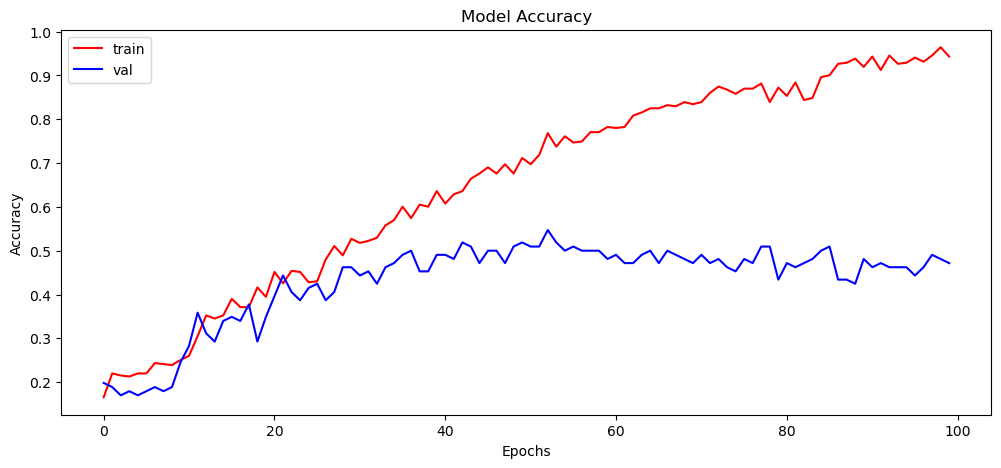

In [11]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Here we analyse how the model is learning with each epoch in terms of accuracy.

In [12]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4735 - loss: 3.8776
Accuracy over the test set: 
  49.15 %


We will use predict function to make predictions using this model also we are finding out the accuracy on the test set.

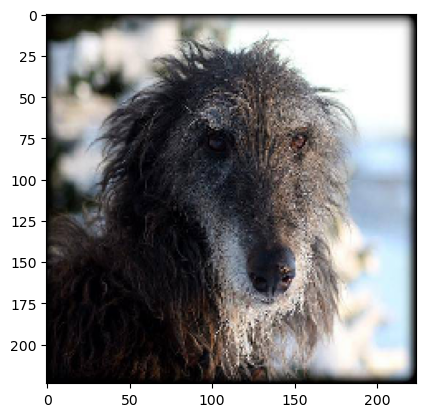

Originally :  scottish_deerhound
Predicted :  entlebucher


In [21]:
# Plotting image to compare
a = 7
plt.imshow(X_test[a,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[a])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[a])])

Here you can see image with its original and predicted label.

## Conclusion:

We started with downloading the dataset creating the model and finding out the predictions using the model. We can optimize different hyper parameters in order to tune this model for a higher accuracy. This model can be used to predict different breeds of dogs which can be further used by different NGO's working on saving animals and for educational purposes also.

In [23]:
pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/9b/ea/7219c01b5e92d02d2bc994a36245d99331cd66eb12d284707a2060a013d0/streamlit-1.32.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/c5/e4/7fcceef127badbb0d644d730d992410e4f3799b295c9964a172f92a469c7/altair-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/fb/2b/a64c2d25a37aeb921fddb929111413049fc5f8b9a4c1aefaffaafe768d54/cachetools-5.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/67/c7/995360c87dd74e27539ccbfecddfb58e08f140d849fcd7